# 1단계 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import clear_output

In [3]:
!wget 'https://raw.githubusercontent.com/dhrim/2022_DL_competition_study/master/material/data/iris.csv'
clear_output()

In [19]:
import pandas as pd 
df = pd.read_csv('iris.csv')
df.isnull().sum()

septal_length    0
septal_width     0
petal_length     0
petal_width      0
setosa           0
versicolor       0
virginica        0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


## 정규화 

In [21]:
min_value = np.min(df,axis=0).values
max_value = np.max(df,axis=0).values
columns = df.columns

In [22]:
df = pd.DataFrame((np.array(df) - min_value)/(max_value-min_value))
df.columns = columns

In [23]:
df

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,0.571429,0.333333,0.779661,0.875000,0.0,0.0,1.0
1,0.171429,0.125000,0.389831,0.375000,0.0,1.0,0.0
2,0.142857,0.208333,0.593220,0.666667,0.0,0.0,1.0
3,0.142857,0.458333,0.084746,0.000000,1.0,0.0,0.0
4,0.371429,0.750000,0.118644,0.083333,1.0,0.0,0.0
...,...,...,...,...,...,...,...
115,0.314286,0.250000,0.576271,0.458333,0.0,1.0,0.0
116,0.371429,0.416667,0.542373,0.458333,0.0,1.0,0.0
117,0.000000,0.375000,0.067797,0.041667,1.0,0.0,0.0
118,0.114286,0.416667,0.067797,0.000000,1.0,0.0,0.0


## 기본 전처리 

In [24]:
!wget 'https://raw.githubusercontent.com/dhrim/2022_DL_competition_study/master/material/data/flawed_iris.csv'

--2022-06-24 10:51:21--  https://raw.githubusercontent.com/dhrim/2022_DL_competition_study/master/material/data/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv’

flawed_iris.csv     100%[===================>]   2.72K  --.-KB/s    in 0s      

2022-06-24 10:51:22 (25.6 MB/s) - ‘flawed_iris.csv’ saved [2782/2782]



In [25]:
df = pd.read_csv('/content/flawed_iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB


### 결측치 처리 

In [26]:
df = df.dropna().reset_index(drop=True)
df['septal_width'] = df['septal_width'].map(float)

### 이상치 처리 

In [27]:
def drop_outlier(df,column):
  c_df = df[column]
  Q1 = np.percentile(c_df,25)
  Q3 = np.percentile(c_df,75)
  IQR = Q3-Q1
  Upper_limit = Q3 + (1.5*IQR)
  Lower_limit = Q1 - (1.5*IQR)

  df = df[(c_df<=Upper_limit) & (c_df>=Lower_limit)].reset_index(drop=True)
  return df 

column_list = df.columns[:-2]
for column in column_list:
  df = drop_outlier(df,column)

### 인코딩 

In [28]:
label_encoder= {b:a for a,b in enumerate(np.unique(df['color']))}
label_encoder

{'dark': 0, 'light': 1, 'medium': 2}

In [29]:
df['color'] = df['color'].map(label_encoder)

### 정규화 

In [30]:
temp_df = np.array(df.drop(columns=['color','class']))
min = np.min(temp_df,axis=0)
max = np.max(temp_df,axis=0)
temp_df = (temp_df-min)/(max-min)
df[['septal_length','septal_width','petal_length','petal_width']] = temp_df

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  97 non-null     float64
 1   septal_width   97 non-null     float64
 2   petal_length   97 non-null     float64
 3   petal_width    97 non-null     float64
 4   color          97 non-null     int64  
 5   class          97 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.7 KB


#2단계 

##2-1

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/2022_DL_competition_study/master/material/data/iris.csv

--2022-06-14 12:36:04--  https://raw.githubusercontent.com/dhrim/2022_DL_competition_study/master/material/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   2.66K  --.-KB/s    in 0s      

2022-06-14 12:36:05 (28.3 MB/s) - ‘iris.csv.1’ saved [2720/2720]



In [ ]:
df = pd.read_csv('iris.csv')
columns = df.columns
df = np.array(df.drop(columns = ['setosa','versicolor','virginica']))

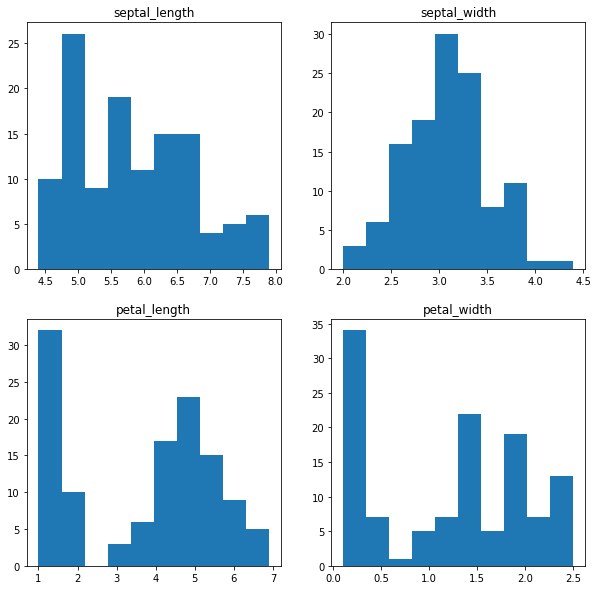

In [ ]:
plt.figure(figsize=(10,10))
for i,column in zip(range(4),columns):
  plt.subplot(2,2,i+1)
  plt.hist(df[:,i])
  plt.title(column)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


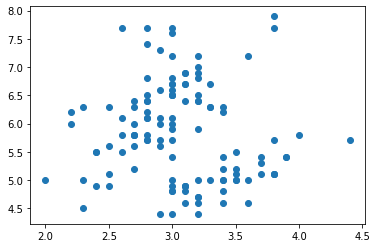

In [ ]:
df = pd.read_csv('iris.csv')
plt.scatter(df['septal_width'],df['septal_length'])
plt.show()

##2-2

In [ ]:
!mkdir flower

In [ ]:
%cd flower
!unzip /content/drive/MyDrive/flowers.zip 
%cd /content/

In [ ]:
from glob import glob
import os 
flowers = ['tulip','daisy','sunflower','dandelion','rose']
std_path = '/content/flower'

img_dirs = []
for i in range(5):
  img_dirs.extend(glob(os.path.join(std_path,flowers[i],'*.jpg')))

In [ ]:
import cv2 
import numpy as np 
imgs = []
for i in range(len(img_dirs)):
  img = cv2.imread(img_dirs[i])
  img = cv2.resize(img,dsize=(128,128))
  imgs.append(img)
imgs = np.array(imgs)  
img.shape

(128, 128, 3)

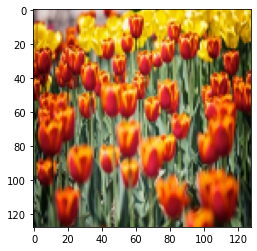

In [ ]:
import matplotlib.pyplot as plt 
img = imgs[0]
plt.imshow(img[:,:,::-1])
plt.show()

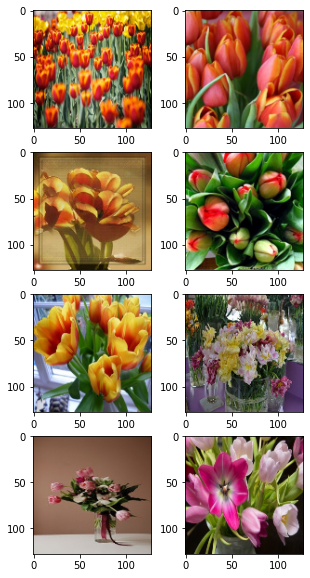

In [ ]:
plt.figure(figsize=(5,10))
for i in range(8):
  img = imgs[i]
  plt.subplot(4,2,i+1)
  plt.imshow(img[:,:,::-1])
plt.show()  

# 3단계

In [5]:
!cp /content/drive/MyDrive/kaggle.json ./

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tabular-playground-series-apr-2022
!unzip /content/tabular-playground-series-apr-2022.zip 

 98% 168M/171M [00:01<00:00, 118MB/s] 
100% 171M/171M [00:01<00:00, 103MB/s]
Archive:  /content/tabular-playground-series-apr-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: train_labels.csv        


In [7]:
df = pd.read_csv('train.csv')
df.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [16]:
train_labels = pd.read_csv('train_labels.csv')
train_labels['state'].value_counts()

1    13014
0    12954
Name: state, dtype: int64

In [ ]:

 df.isnull().sum()

sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558080 entries, 0 to 1558079
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sequence   1558080 non-null  int64  
 1   subject    1558080 non-null  int64  
 2   step       1558080 non-null  int64  
 3   sensor_00  1558080 non-null  float64
 4   sensor_01  1558080 non-null  float64
 5   sensor_02  1558080 non-null  float64
 6   sensor_03  1558080 non-null  float64
 7   sensor_04  1558080 non-null  float64
 8   sensor_05  1558080 non-null  float64
 9   sensor_06  1558080 non-null  float64
 10  sensor_07  1558080 non-null  float64
 11  sensor_08  1558080 non-null  float64
 12  sensor_09  1558080 non-null  float64
 13  sensor_10  1558080 non-null  float64
 14  sensor_11  1558080 non-null  float64
 15  sensor_12  1558080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 190.2 MB


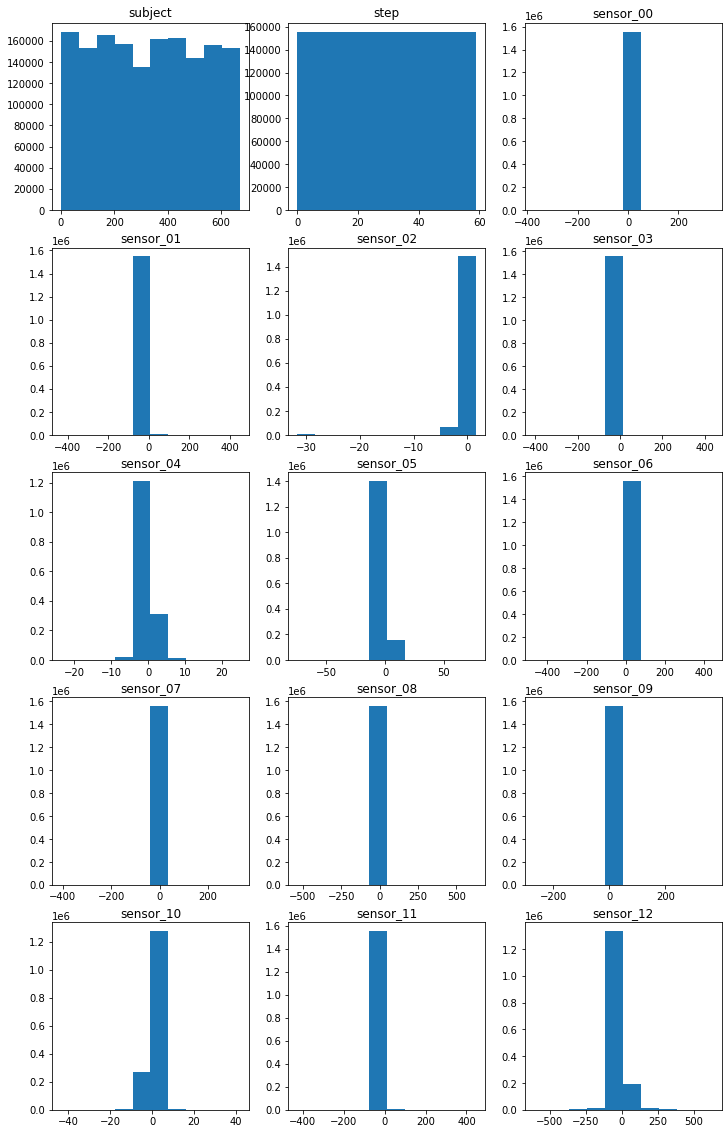

In [ ]:
columns = df.drop(columns=['sequence']).columns
plt.figure(figsize=(12,20))
for i in range(len(columns)):
  plt.subplot(5,3,i+1)
  plt.hist(df[columns[i]])
  plt.title(columns[i])
plt.show()  

In [ ]:

def drop_outlier(df,column):
  c_df = df[column]
  Q1 = np.percentile(c_df,25)
  Q3 = np.percentile(c_df,75)
  IQR = Q3-Q1
  Upper_limit = Q3 + (1.5*IQR)
  Lower_limit = Q1 - (1.5*IQR)

  df = df[(c_df<=Upper_limit) & (c_df>=Lower_limit)].reset_index(drop=True)
  return df 


for column in columns:
  df = drop_outlier(df,column)

In [ ]:
df

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
1,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
2,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
3,0,47,17,-0.683926,-0.743697,0.666667,-0.103540,0.265740,-1.162304,-0.756831,-0.116794,0.0,-0.937861,0.386155,-0.088477,0.955243
4,0,47,22,-0.275116,-0.957983,0.666667,-0.781416,-0.320191,0.278235,-0.745902,-0.433588,-1.7,0.349711,-0.118028,-1.208848,-0.672634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424631,25967,327,50,0.299073,0.485294,-1.332820,0.543363,-0.042965,-0.119671,-0.249545,1.054962,-1.1,-0.082370,-0.048687,0.738683,0.909207
424632,25967,327,51,-0.410355,0.322479,-1.332820,-1.417699,-0.883976,-0.610322,-0.375228,-1.291603,0.5,0.283960,-0.731583,0.007202,-0.830776
424633,25967,327,53,0.915765,-0.719538,-1.666153,0.400885,0.359774,-0.371728,-0.804189,0.978626,0.2,0.646676,0.669271,0.229424,1.064365
424634,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
